In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#загружаем базу новопришедших игроков США
for_test = pd.read_csv('full base.csv', sep=';', encoding='latin-1')

In [4]:
filter1 = for_test['Country']=='US'
filter2 = for_test['User level']==1
for_test = for_test[filter1&filter2]
for_test.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Channel,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available
2002,7909154.0,05.05.2023 19:55,05.05.2023 22:42,US,False,Non paying,more likely not to pay,0.00,0,NaN,...,Chartboost,1.0,apple,IPAD PRO (WIFI),1.23.18,1.23.18,mobisharks,3.0000,0,True
2005,7906324.0,05.05.2023 19:52,05.05.2023 22:07,US,False,Non paying,wonât pay,0.00,0,NaN,...,Organic,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,False
2007,7907885.0,05.05.2023 19:50,05.05.2023 21:30,US,False,Non paying,wonât pay,0.00,0,NaN,...,Organic,1.0,apple,IPAD AIR (CELLULAR),1.23.18,1.23.18,mobisharks,1.0000,0,True
2008,7906761.0,05.05.2023 19:46,05.05.2023 20:26,US,False,Non paying,more likely to pay,0.00,0,NaN,...,Organic,1.0,apple,IPAD AIR (CELLULAR),1.23.18,1.23.18,mobisharks,3.0000,0,True
2012,7906068.0,05.05.2023 19:44,05.05.2023 21:29,US,False,Non paying,wonât pay,0.00,0,NaN,...,Organic,1.0,apple,IPAD MINI 2 (CELLULAR),1.23.18,1.23.18,mobisharks,3.0000,0,True


In [5]:
for_test['Predicted paying status'] = for_test['Predicted paying status'].replace('wonât pay','wont pay')

In [6]:
#создаем столбец с рандомными значениями от 0 до 1
for_test['random'] = np.random.uniform(0,1,size = len(for_test['Client ID']))
for_test.reset_index().head()

,index,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,...,User level,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,random
0,2002,7909154.0,05.05.2023 19:55,05.05.2023 22:42,US,False,Non paying,more likely not to pay,0.00,0,...,1.0,apple,IPAD PRO (WIFI),1.23.18,1.23.18,mobisharks,3.0000,0,True,0.563090
1,2005,7906324.0,05.05.2023 19:52,05.05.2023 22:07,US,False,Non paying,wont pay,0.00,0,...,1.0,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,False,0.663784
2,2007,7907885.0,05.05.2023 19:50,05.05.2023 21:30,US,False,Non paying,wont pay,0.00,0,...,1.0,apple,IPAD AIR (CELLULAR),1.23.18,1.23.18,mobisharks,1.0000,0,True,0.820608
3,2008,7906761.0,05.05.2023 19:46,05.05.2023 20:26,US,False,Non paying,more likely to pay,0.00,0,...,1.0,apple,IPAD AIR (CELLULAR),1.23.18,1.23.18,mobisharks,3.0000,0,True,0.200353
4,2012,7906068.0,05.05.2023 19:44,05.05.2023 21:29,US,False,Non paying,wont pay,0.00,0,...,1.0,apple,IPAD MINI 2 (CELLULAR),1.23.18,1.23.18,mobisharks,3.0000,0,True,0.335863


In [7]:
#функция для деления выборки на группы методом рандома
def spliting(for_test):
    if for_test['random']<0.5:
        return 1
    else:
        return 2

In [8]:
for_test['grouping'] = for_test.apply(spliting, axis = 1)
for_test.head()

,Client ID,Install date,Last seen,Country,Payer,Paying capacity,Predicted paying status,Payments sum,Payments count,First payment date,...,Platfrom,Device,Current app version,First app version,Agency,Session count,Max days,Push available,random,grouping
2002,7909154.0,05.05.2023 19:55,05.05.2023 22:42,US,False,Non paying,more likely not to pay,0.00,0,NaN,...,apple,IPAD PRO (WIFI),1.23.18,1.23.18,mobisharks,3.0000,0,True,0.563090,2
2005,7906324.0,05.05.2023 19:52,05.05.2023 22:07,US,False,Non paying,wont pay,0.00,0,NaN,...,apple,IPHONE 6S PLUS,1.23.18,1.23.18,mobisharks,3.0000,0,False,0.663784,2
2007,7907885.0,05.05.2023 19:50,05.05.2023 21:30,US,False,Non paying,wont pay,0.00,0,NaN,...,apple,IPAD AIR (CELLULAR),1.23.18,1.23.18,mobisharks,1.0000,0,True,0.820608,2
2008,7906761.0,05.05.2023 19:46,05.05.2023 20:26,US,False,Non paying,more likely to pay,0.00,0,NaN,...,apple,IPAD AIR (CELLULAR),1.23.18,1.23.18,mobisharks,3.0000,0,True,0.200353,1
2012,7906068.0,05.05.2023 19:44,05.05.2023 21:29,US,False,Non paying,wont pay,0.00,0,NaN,...,apple,IPAD MINI 2 (CELLULAR),1.23.18,1.23.18,mobisharks,3.0000,0,True,0.335863,1


In [9]:
#размер выборки 1
group1 = for_test[for_test['grouping']==1]
group1.head()
len(group1)

326

In [10]:
#размер выборки 2
group2 = for_test[for_test['grouping']==2]
group2.head()
len(group2)

305

Text(0.5, 1.0, 'Группа 1.Распределение по категориям платежности игроков')

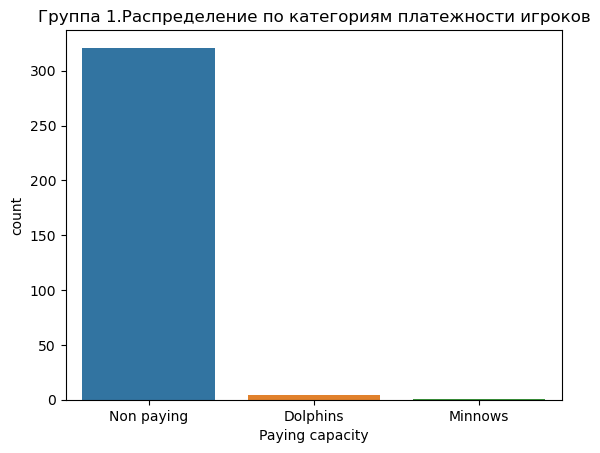

In [11]:
sns.countplot(x=group1['Paying capacity'], order=group1['Paying capacity'].value_counts().index)
plt.title("Группа 1.Распределение по категориям платежности игроков")

Text(0.5, 1.0, 'Группа2.Распределение по категориям платежности игроков')

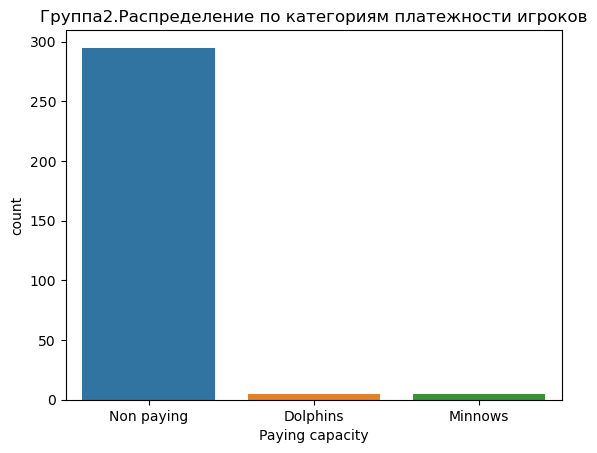

In [12]:
sns.countplot(x=group2['Paying capacity'], order=group2['Paying capacity'].value_counts().index)
plt.title("Группа2.Распределение по категориям платежности игроков")

Text(0.5, 1.0, 'Группа 1. Распределения каналов прихода игроков')

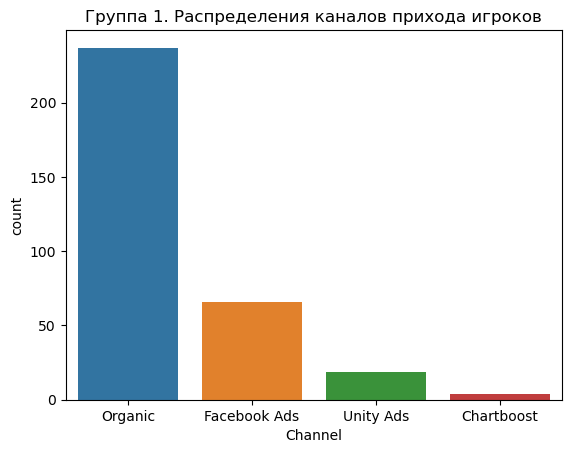

In [13]:
sns.countplot(x=group1['Channel'], order=group1['Channel'].value_counts().index)
plt.title ('Группа 1. Распределения каналов прихода игроков')

Text(0.5, 1.0, 'Группа 2. Распределения каналов прихода игроков')

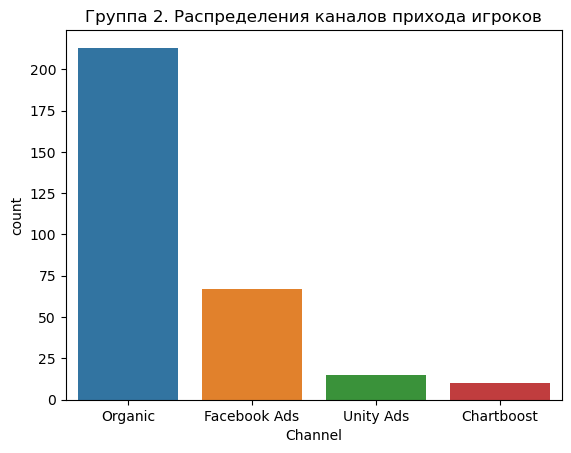

In [14]:
sns.countplot(x=group2['Channel'], order=group2['Channel'].value_counts().index)
plt.title ('Группа 2. Распределения каналов прихода игроков')

Text(0.5, 1.0, 'Группа1. Распределение по прогнозируемому статусу игрока')

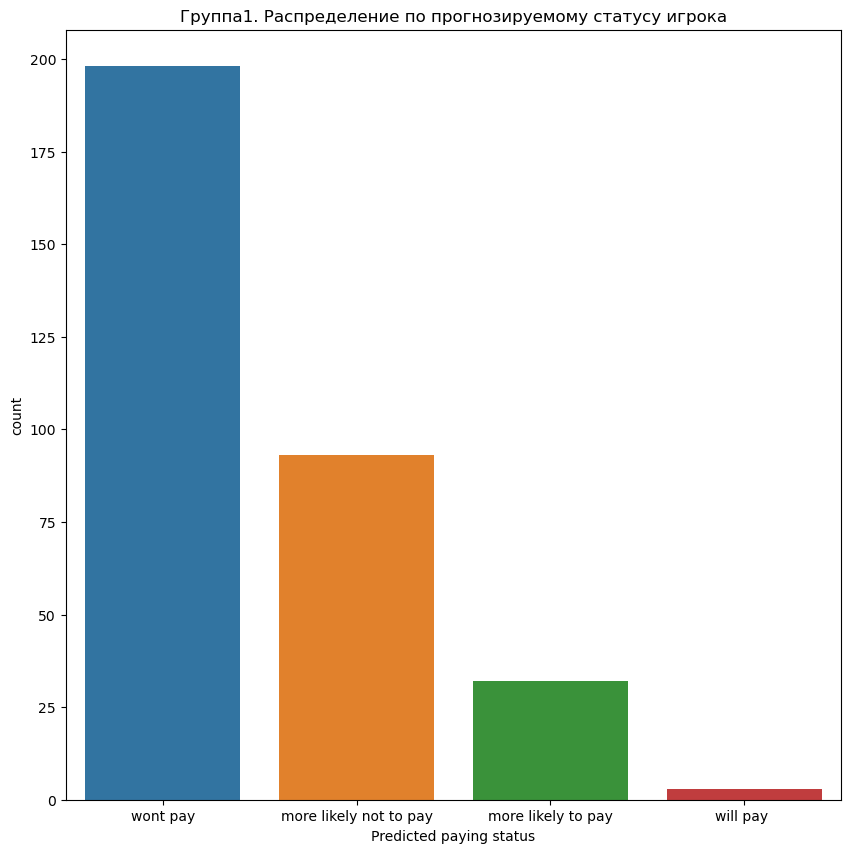

In [15]:
plt.figure(figsize = (10,10))
sns.countplot(x=group1['Predicted paying status'], order=group1['Predicted paying status'].value_counts().index)
plt.title("Группа1. Распределение по прогнозируемому статусу игрока")

Text(0.5, 1.0, 'Группа 2. Распределение по прогнозируемому статусу игрока')

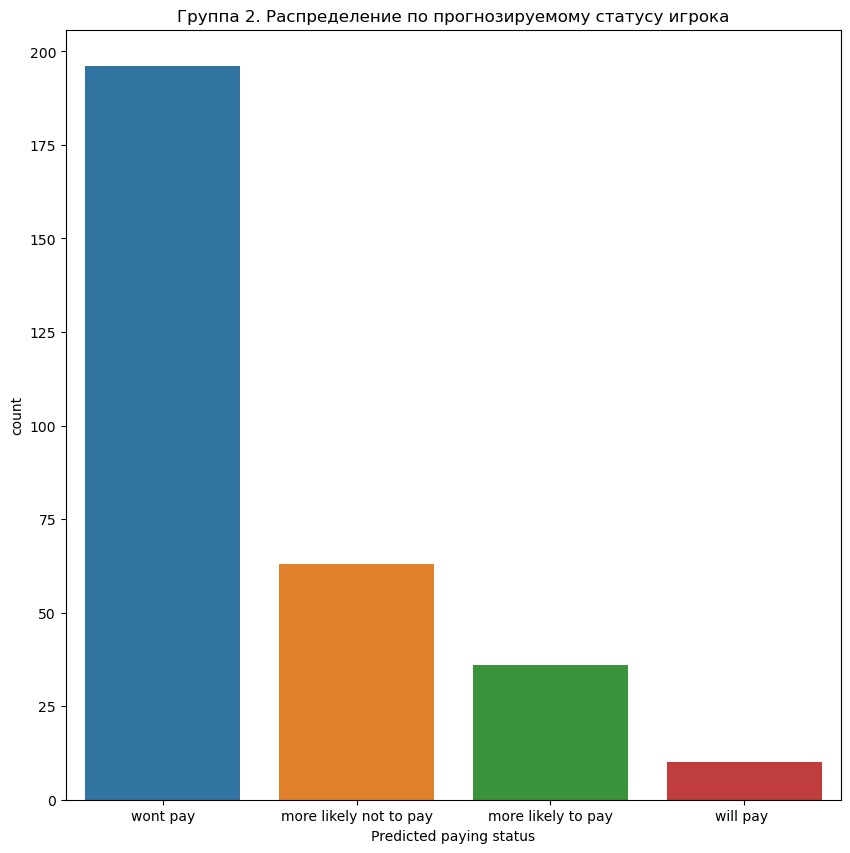

In [16]:
plt.figure(figsize = (10,10))
sns.countplot(x=group2['Predicted paying status'], order=group2['Predicted paying status'].value_counts().index)
plt.title("Группа 2. Распределение по прогнозируемому статусу игрока")